<a href="https://colab.research.google.com/github/Gowthamreddy498/Fuel-consumption-prediction/blob/main/regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Fuel_Consumption_Prediction.csv')
df.head()


,Vehicle_ID,Brand,Model,Engine_Size,Fuel_Type,Weight,Mileage,Fuel_Consumption,Age,Transmission,Price
0,326b3bdc-1077-4cd9-bcff-9f3b9d760a44,Toyota,Truck,4.925959,Electric,2551.005816,11.107329,6.354874,19,Manual,33933.03787
1,968a5c3b-b777-4a86-9a12-ed1d0a6e1405,Honda,SUV,3.672303,Hybrid,1173.321044,33.043689,11.545140,1,Automatic,25368.81219
2,6badc002-010c-4372-841c-db3e313a2763,Chevrolet,Sedan,3.016107,Petrol,1699.353283,49.755672,5.455976,4,Automatic,39336.66543
3,8025491f-3bff-44f4-8a7b-a8951df0ddf0,Ford,SUV,4.829519,Petrol,1626.922174,43.289599,12.663525,18,Manual,18547.30059
4,a8d8f96b-debb-44d6-aa6f-435b4ae7c709,Ford,Truck,3.987272,Diesel,1170.770187,10.413424,9.102556,5,Automatic,44354.76470


In [ ]:
# See the no. of rows and columns
df.shape

(922, 11)

In [ ]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Vehicle_ID', 'Brand', 'Model', 'Engine_Size', 'Fuel_Type', 'Weight', 'Mileage', 'Fuel_Consumption', 'Age', 'Transmission', 'Price']


In [ ]:
# Display data type of each feature
df.dtypes

,0
Vehicle_ID,object
Brand,object
Model,object
Engine_Size,float64
Fuel_Type,object
Weight,float64
Mileage,float64
Fuel_Consumption,float64
Age,int64
Transmission,object


In [ ]:
df.describe()

,Engine_Size,Weight,Mileage,Fuel_Consumption,Age,Price
count,922.000000,842.000000,922.000000,838.000000,922.000000,855.000000
mean,3.030867,1890.738232,30.120201,12.541709,9.992408,30267.092842
std,1.176322,629.296959,11.590594,4.313442,5.443516,11243.832296
min,1.000490,806.417814,10.022415,5.014184,1.000000,10005.971250
25%,2.016195,1363.162048,20.513312,9.018980,5.000000,20785.276110
50%,3.049709,1901.628845,30.087306,12.623913,10.000000,30226.909430
75%,4.084137,2440.833076,40.071055,16.300309,15.000000,40107.431545
max,4.996609,2997.782055,49.901098,19.975654,19.000000,49930.003680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Vehicle_ID        922 non-null    object 
 1   Brand             922 non-null    object 
 2   Model             922 non-null    object 
 3   Engine_Size       922 non-null    float64
 4   Fuel_Type         922 non-null    object 
 5   Weight            842 non-null    float64
 6   Mileage           922 non-null    float64
 7   Fuel_Consumption  838 non-null    float64
 8   Age               922 non-null    int64  
 9   Transmission      922 non-null    object 
 10  Price             855 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 79.4+ KB


In [ ]:
# find the null values
df.isnull().sum()

,0
Vehicle_ID,0
Brand,0
Model,0
Engine_Size,0
Fuel_Type,0
Weight,80
Mileage,0
Fuel_Consumption,84
Age,0
Transmission,0


In [ ]:
# Remove unwanted columns
df.drop(columns=['Vehicle_ID'], inplace=True)  # specify the columns to remove

In [ ]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [ ]:
# find the null values
df.isnull().sum()

,0
Brand,0
Model,0
Engine_Size,0
Fuel_Type,0
Weight,0
Mileage,0
Fuel_Consumption,0
Age,0
Transmission,0
Price,0


In [ ]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [ ]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Fuel_Consumption', axis=1)  # -- independent variable
y = df['Fuel_Consumption'] # -- dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,Brand,Model,Engine_Size,Fuel_Type,Weight,Mileage,Age,Transmission,Price
0,4,3,0.982320,1,0.796120,0.027205,1.000000,1,0.599315
1,3,1,0.668602,2,0.167431,0.577283,0.000000,0,0.384802
2,1,2,0.504394,3,0.407479,0.996353,0.166667,0,0.734663
3,2,1,0.958187,3,0.374426,0.834210,0.944444,1,0.213940
4,2,3,0.747421,0,0.166267,0.009805,0.222222,0,0.860354
...,...,...,...,...,...,...,...,...,...
917,4,3,0.560506,3,0.325157,0.581241,0.500000,1,0.397632
918,1,4,0.086229,3,0.494815,0.327546,0.777778,1,0.197302
919,3,1,0.210809,2,0.670104,0.720984,0.000000,0,0.891345
920,0,0,0.668091,3,0.044940,0.935124,0.055556,1,0.456066


In [ ]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [ ]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.06861866116431291
Mean Absolute Error: 0.21068495208609841
R-squared: -0.04719394400114152


In [ ]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.07579037818060974
Mean Absolute Error: 0.22435337690810214
R-squared: -0.1566419935568193


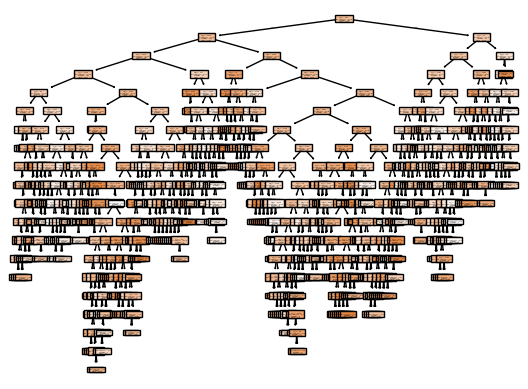

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [ ]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
